<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Monte%20Carlo%20simulation/2023_summer_CCP/3_Ising_Model/2D_Ising_model_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2D Ising Model

The Ising model is one of the simplest and most studied models in statistical mechanics. It describes a system of spins placed on a lattice, where each spin can take values of +1 or -1. These spins interact with their neighboring spins, and possibly with an external magnetic field.

The Hamiltonian \( $H$ \) of the 2D Ising model, describing the energy of a given spin configuration, is given by:

$ H = -J \sum_{\langle ij \rangle} s_i s_j$

Here:
- The sum \( $\sum_{\langle ij \rangle}$ \) is over nearest-neighbor pairs.
- \( $s_i$ \) represents the spin value (+1 or -1) at the lattice site \( $i$ \).
- \( $J$ \) is the coupling strength. It determines the nature of spin-spin interaction:
  - \( $J > 0$ \): Favorable or ferromagnetic interaction (neighboring spins prefer to align).
  - \( $J < 0$ \): Unfavorable or antiferromagnetic interaction (neighboring spins prefer to be opposite).

The probability \( $P$ \) of the system being in a state with energy \( $E$ \) at temperature \( $T$ \) is given by the Boltzmann distribution:

$ P(E) = \frac{1}{Z}\exp(-E/k_B T)$

Where:
- \( $k_B$ \) is the Boltzmann constant.
- \( $T$ \) is the absolute temperature.
- \( $Z$ \) is the partition function, which ensures normalization of the probability distribution.

In the code provided:
- Monte Carlo techniques are used to simulate the 2D Ising model. This involves randomly selecting spins and deciding whether to flip them based on energy considerations.
- The Metropolis-Hastings criterion is employed to decide whether a proposed spin flip is accepted or not.
- Over time, this method provides a statistically accurate representation of the system's behavior at a given temperature.


## 2D Ising model simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Ising2D:
    """
    Class representing a 2D Ising model with Monte Carlo simulation
    """

    def __init__(self, size, temperature, coupling):
        """
        Initialize the Ising model

        size : int
            The size of the lattice, i.e., number of spins along each dimension.

        temperature : float
            The temperature of the system.

        coupling : float
            The interaction strength between spins.
        """
        self.size = size
        self.temperature = temperature
        self.coupling = coupling
        self.lattice = np.random.choice([1, -1], size=(size, size))
        # save initial state
        self.magnetization = [np.sum(self.lattice) / (self.size ** 2)]
        self.snapshots = [self.lattice.copy()]

    def energy(self):
        """
        Compute the total energy of the system
        """
        ### EDIT HERE
        # This method is not used in this Class, but completing it helps you understand Ising model.
        return en

    def propose_flip(self):
        """
        Propose flipping a random spin in the lattice
        """
        x, y = np.random.randint(0, self.size, 2) # Understand this part
        energy_change = # EDIT HERE - better to include the periodic boundary condition (if you are not sure what it is, google it)
        return x, y, energy_change

    def accept_flip(self, x, y, energy_change):
        """
        Accept the flip according to the Metropolis-Hastings criterion
        """
        # This is a rule - worth trying to understand, but not necessary at this moment.
        if np.random.random() < np.exp(-energy_change / self.temperature):
            self.lattice[x, y] *= -1

    def monte_carlo_step(self, step_now=0):
        """
        Perform one Monte Carlo step, i.e., propose and carry out a spin flip for each spin on average
        """
        # Propose a move
        for _ in range(self.size ** 2): # loop runs for total number of spins times
            x, y, energy_change = self.propose_flip() # propose a single flip
            self.accept_flip(x, y, energy_change) # Check acceptance of the move

        # Record magnetization - Track total sum of spins, normalized
        self.magnetization.append(np.sum(self.lattice) / (self.size ** 2))

## Plot how a configuration evolves with MC step

In [ ]:
def plot_evolution(system, snapshot_interval):
    """
    Plot the evolution of the Ising model, showing both the state of the lattice and the total magnetization
    """
    fig = plt.figure(figsize=(2*len(system.snapshots), 5))  # adjust the figure size here
    grid = plt.GridSpec(2, len(system.snapshots), hspace=0.2, wspace=0.2)

    # Plot lattice snapshots
    for i, snapshot in enumerate(system.snapshots):
        ax = fig.add_subplot(grid[0, i])
        ax.imshow(snapshot, cmap='gray')
        ax.set_title(f"Step {i * snapshot_interval}")
        if i != 0:
            ax.get_yaxis().set_visible(False)  # Removes the y-axis for snapshots that are not the leftmost

    # Plot magnetization
    ax2 = fig.add_subplot(grid[1, :])
    ax2.plot(system.magnetization)
    ax2.set_ylim(-1.1, 1.1)
    #ax2.set_title('Total Sum of Spins vs. MC Step')
    ax2.set_xlabel('MC Step * total number of spins')
    ax2.set_ylabel('Normalized total magnetization')
    ax2.grid(True)

    # Draw markers and arrows on magnetization plot
    snapshot_steps = [i*snapshot_interval for i in range(len(system.snapshots))]
    ax2.plot(snapshot_steps, [system.magnetization[i] for i in snapshot_steps], 'ro')  # Plot markers

#     # Add arrows
#     for step in snapshot_steps:
#         ax2.annotate("", xy=(step, system.magnetization[step]), xytext=(step, -0.2),
#                     arrowprops=dict(arrowstyle="->"))

    plt.show()


## Run the simulation

- $J$ stays the same, which determines a particular chemical system itself.
- Our control variable is the temperature $T$.
- The example below runs five independent runs to average over.
- Normalized total magnetization is the sum of all the spins normalized by the total number of spins.

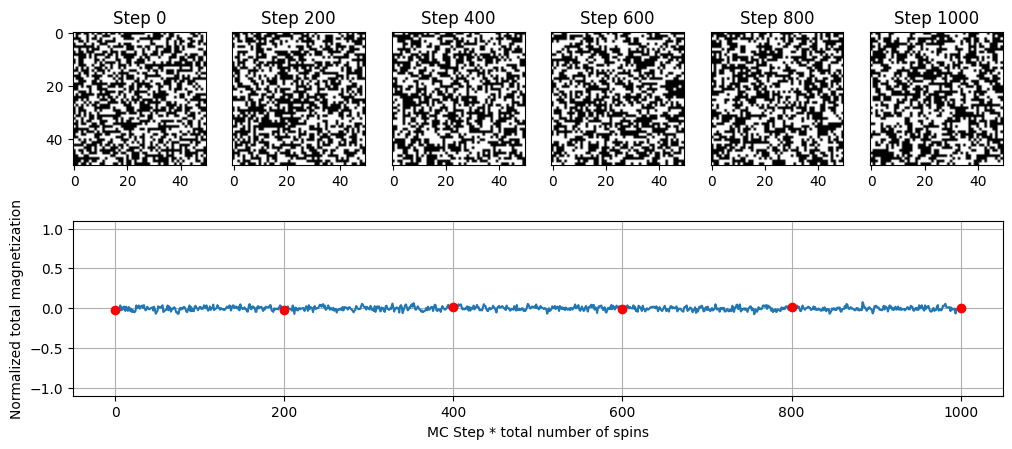

In [ ]:
# Create an Ising system
size = 50
coupling = 1.0
num_steps = 1000 # number of MC cycle
snapshot_interval = num_steps // 5  # Change this to control how frequently snapshots are taken

# Control variable
temperature = 10.0

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
# Plot the result
plot_evolution(system, snapshot_interval)

In [ ]:
# Control variable
temperature = 5.0

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
# Plot the result
plot_evolution(system, snapshot_interval)

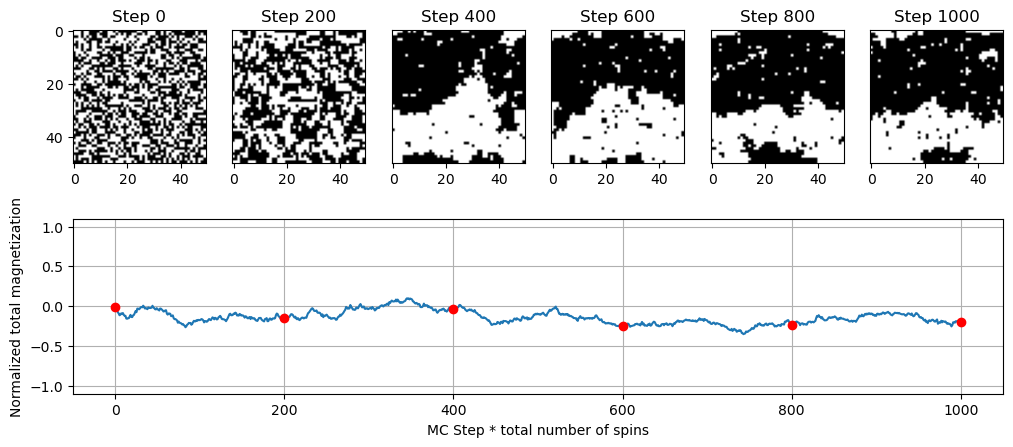

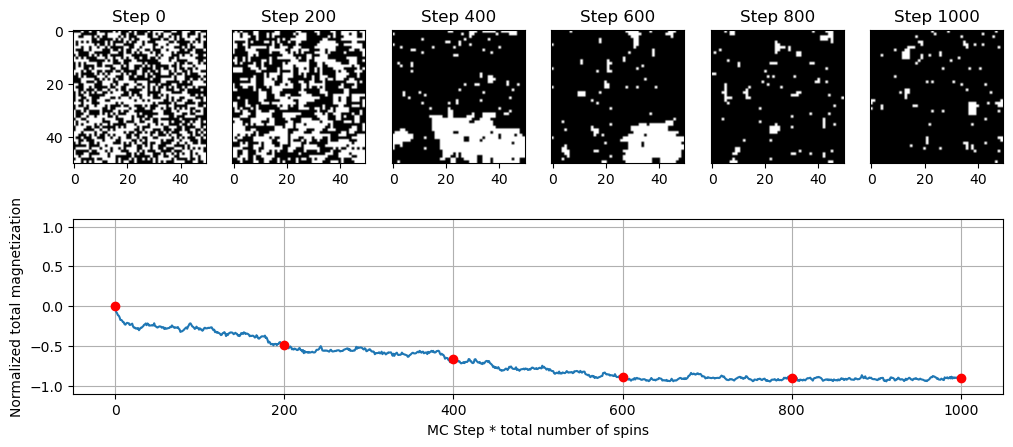

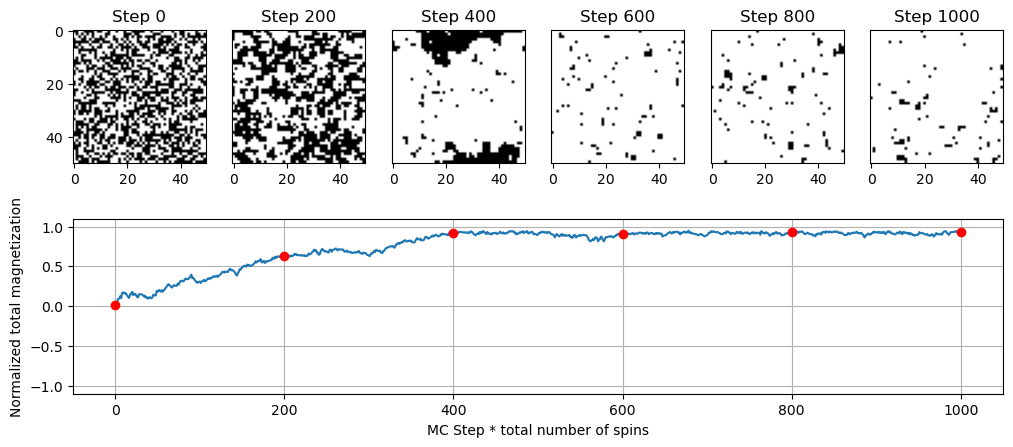

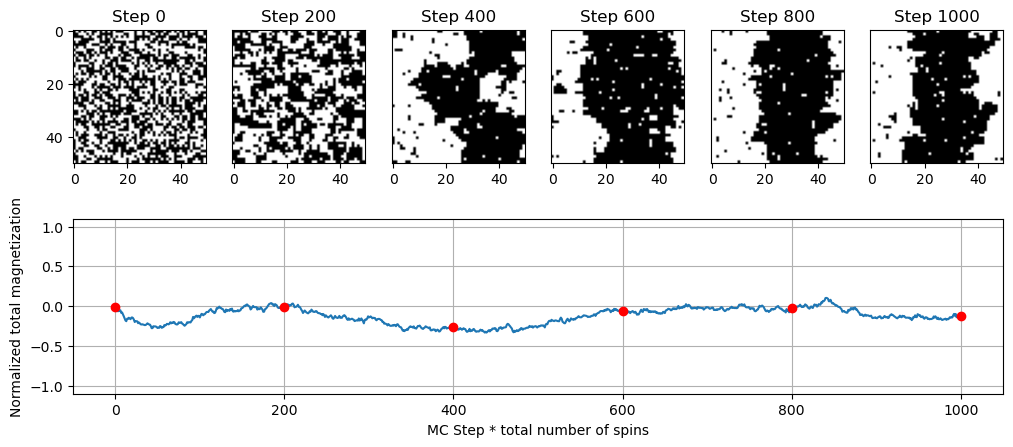

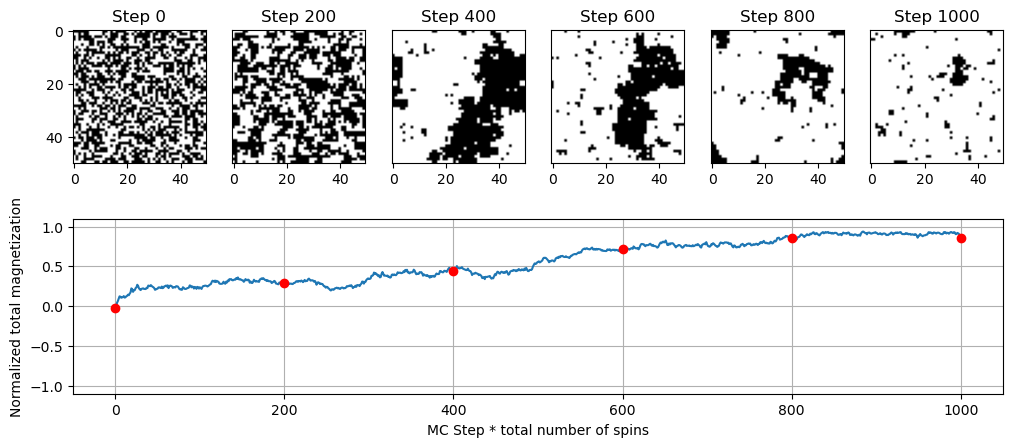

In [ ]:
# Control variable
temperature = 2.0

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
    # Plot the result
    plot_evolution(system, snapshot_interval)

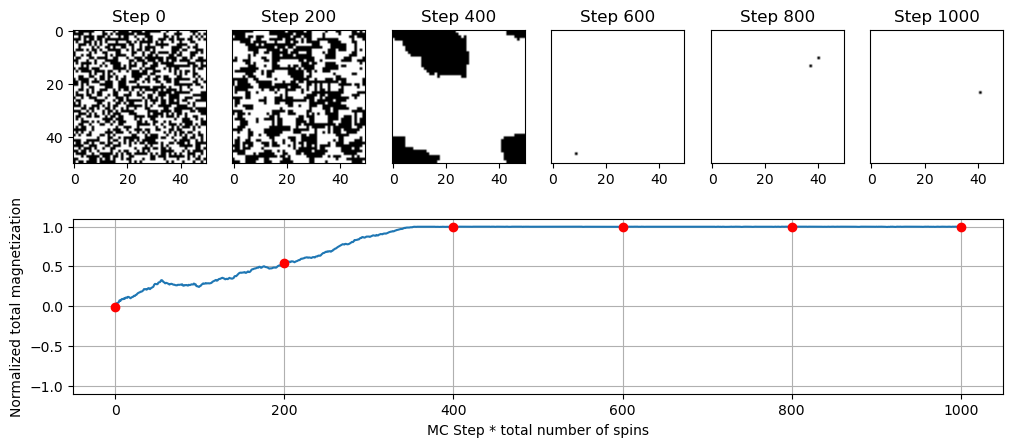

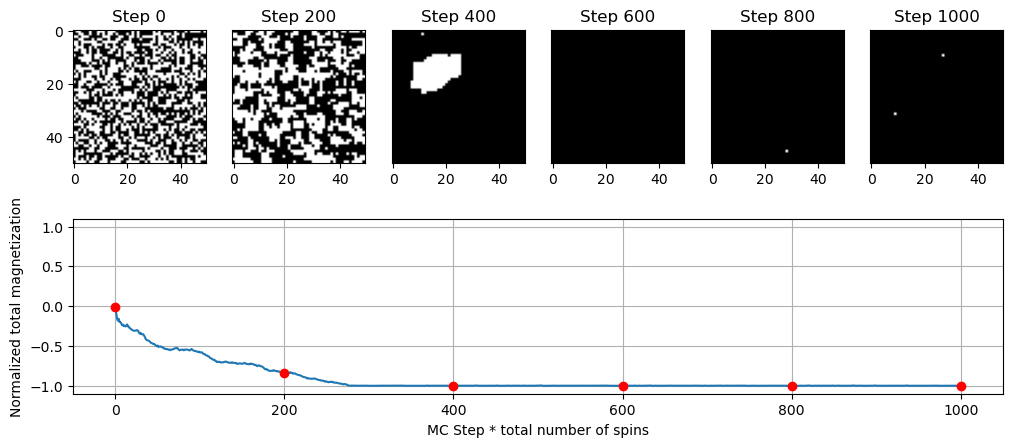

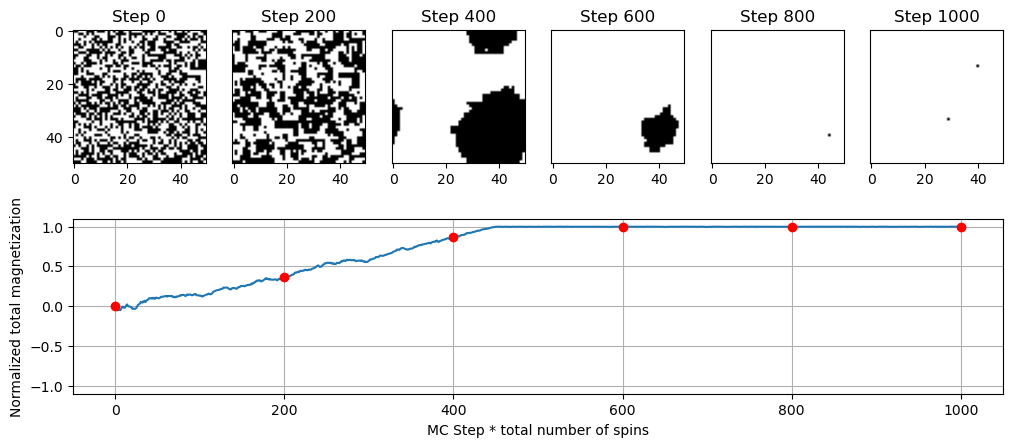

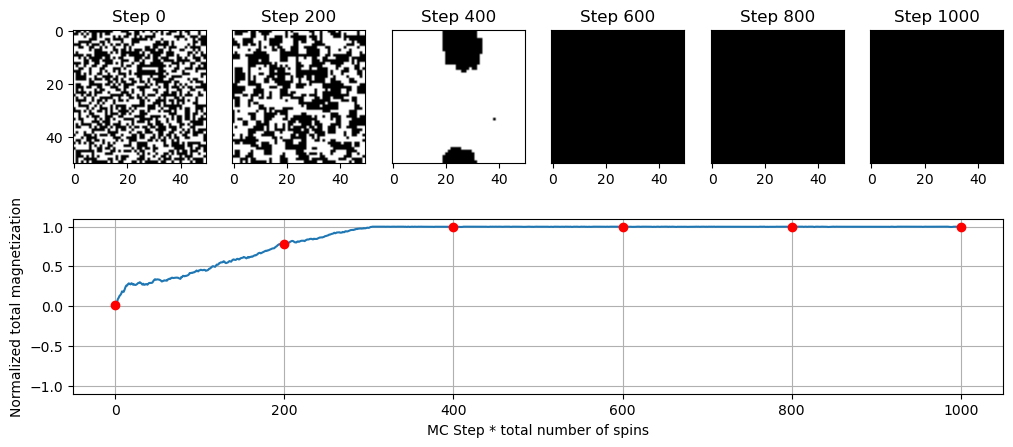

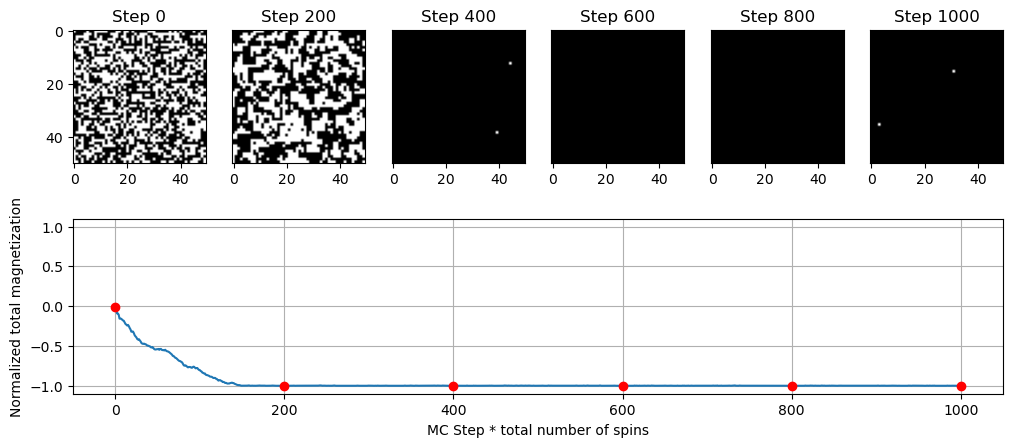

In [ ]:
# Control variable
temperature = 1.0

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
    # Plot the result
    plot_evolution(system, snapshot_interval)

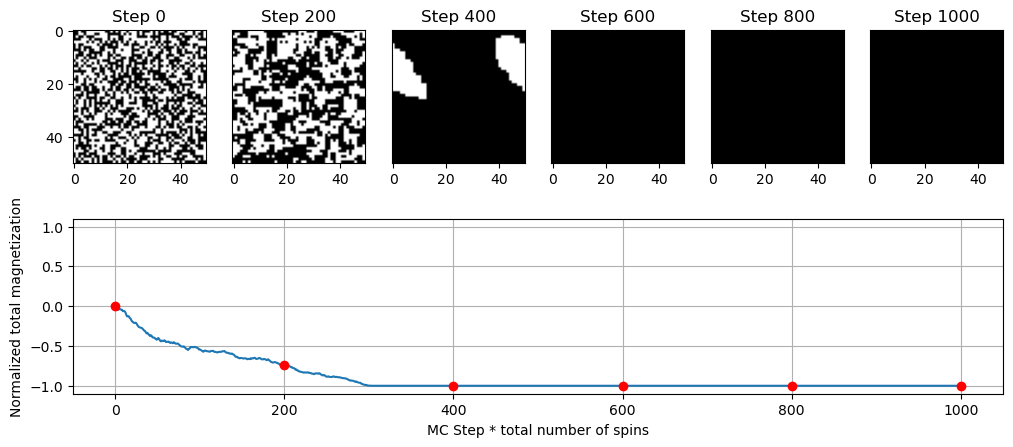

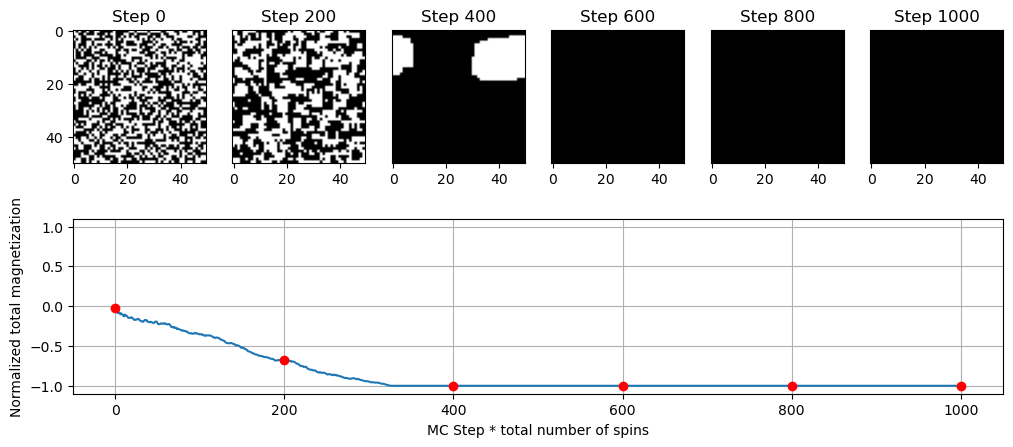

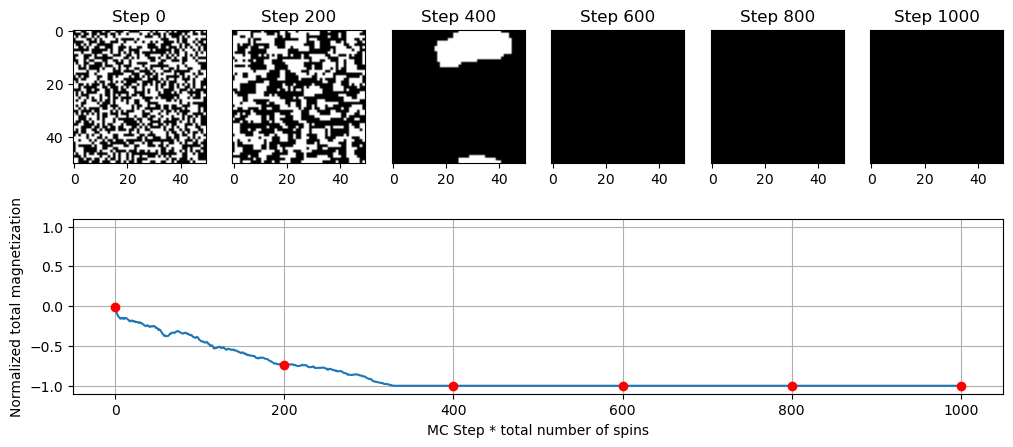

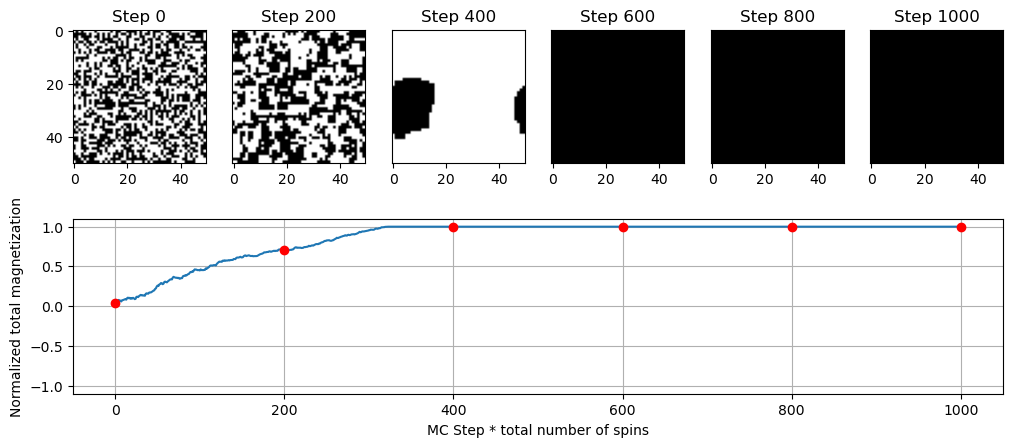

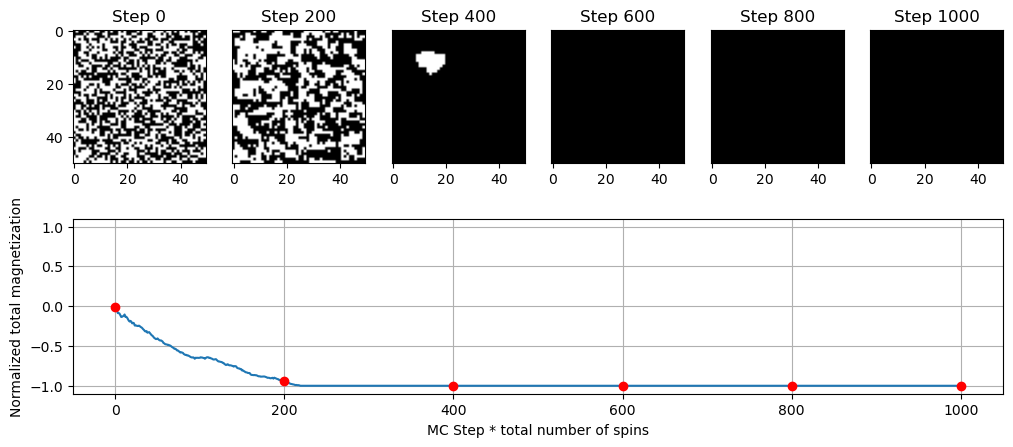

In [ ]:
# Control variable
temperature = 0.5

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
    # Plot the result
    plot_evolution(system, snapshot_interval)